# DATA SCRAPPING

#### Setup of the data scrapping with the google YouTube API

In [2]:
# Import the googleapiclient.discovery from the Build library
from googleapiclient.discovery import build
import creds  # Import your API key from the creds module

# Build YouTube API service
youtube = build('youtube', 'v3', developerKey=creds.API_KEY)

# Make API requests to retrieve comments (example for a specific video)
video_id = 'uiUPD-z9DTg'  # Replace with the actual video ID

# Request the video comments
comments = []
next_page_token = None

while True:
    comments_request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        textFormat='plainText',
        pageToken=next_page_token
    )

    comments_response = comments_request.execute()

    # Extract comments, usernames, and dates from the response
    for item in comments_response['items']:
        comment_text = item['snippet']['topLevelComment']['snippet']['textDisplay']
        username = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
        comment_date = item['snippet']['topLevelComment']['snippet']['publishedAt']

        comment_info = {
            'username': username,
            'date': comment_date,
            'comment': comment_text,
        }

        comments.append(comment_info)

    # Check if there are more pages
    next_page_token = comments_response.get('nextPageToken')
    if not next_page_token:
        break


# Data Importation

In [3]:
# import pandas for data importation
import pandas as pd

youtube_comments = pd.DataFrame(comments)
youtube_comments

,username,date,comment
0,@EM-nw4mr,2024-11-09T21:58:32Z,Sounds like he is talking to 6 yo. Disappointi...
1,@sinekonata,2024-11-09T20:07:44Z,So for those who don't want to spend 15' on so...
2,@emreihsanermis548,2024-11-09T19:53:11Z,The way he speaks is unbearable. This style of...
3,@smanoj262,2024-11-08T18:27:56Z,US had too GOOD for too long on somebody’s cos...
4,@Compatible-n7h,2024-11-06T19:58:04Z,1 year later and history is showing he is comp...
...,...,...,...
10250,@salomoniezpizzaeria3349,2023-06-14T16:31:05Z,2024 nuke🎅
10251,@ImanZahra-lp8pf,2023-06-14T16:26:12Z,Love from pakistan 🔥
10252,@winnerswritethestory3370,2023-06-14T16:25:44Z,I had that gut feeling this is bout the upcomi...
10253,@f.b.i9572,2023-06-14T16:23:50Z,It's India... No question


In [4]:
# Save the DataFrame to a CSV file
filename = 'youtube_comments_df.csv'  # Change the filename as needed
youtube_comments.to_csv(filename, index=False)

print(f"Comments saved to {filename}")

Comments saved to youtube_comments_df.csv


### Sentiment Analysis

In [5]:
pip install nltk

In [6]:
# import the libraries that will be use
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [8]:
# Download VADER lexicon
nltk.download('vader_lexicon')

def perform_sentiment_analysis(data):
    # Initialize the Sentiment Intensity Analyzer
    sia = SentimentIntensityAnalyzer()

    # Add a new column for sentiment scores
    data['Sentiment Score'] = data['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # Categorize sentiment based on the compound score
    data['Sentiment'] = data['Sentiment Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

    return data

# Perform sentiment analysis
sent_data = perform_sentiment_analysis(youtube_comments)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kintonde\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
# Display the result
sent_data

,username,date,comment,Sentiment Score,Sentiment
0,@EM-nw4mr,2024-11-09T21:58:32Z,Sounds like he is talking to 6 yo. Disappointi...,-0.1779,Negative
1,@sinekonata,2024-11-09T20:07:44Z,So for those who don't want to spend 15' on so...,0.1969,Positive
2,@emreihsanermis548,2024-11-09T19:53:11Z,The way he speaks is unbearable. This style of...,0.0000,Neutral
3,@smanoj262,2024-11-08T18:27:56Z,US had too GOOD for too long on somebody’s cos...,0.5622,Positive
4,@Compatible-n7h,2024-11-06T19:58:04Z,1 year later and history is showing he is comp...,-0.5256,Negative
...,...,...,...,...,...
10250,@salomoniezpizzaeria3349,2023-06-14T16:31:05Z,2024 nuke🎅,0.0000,Neutral
10251,@ImanZahra-lp8pf,2023-06-14T16:26:12Z,Love from pakistan 🔥,0.6369,Positive
10252,@winnerswritethestory3370,2023-06-14T16:25:44Z,I had that gut feeling this is bout the upcomi...,0.1280,Positive
10253,@f.b.i9572,2023-06-14T16:23:50Z,It's India... No question,-0.2960,Negative


In [21]:
# Save the DataFrame to a CSV file
filename2 = 'sentiment_score_youtube_comments_df.csv'  # Change the filename as needed
youtube_comments.to_csv(filename2, index=False)

print(f"Comments saved to {filename2}")

Comments saved to sentiment_score_youtube_comments_df.csv


In [22]:
# Descriptive statistics
print(sent_data['Sentiment Score'].describe())

# Count of each sentiment
print(sent_data['Sentiment'].value_counts())

count    10255.000000
mean        -0.000286
std          0.492016
min         -0.997800
25%         -0.363150
50%          0.000000
75%          0.381800
max          0.999800
Name: Sentiment Score, dtype: float64
Sentiment
Negative    3771
Positive    3760
Neutral     2724
Name: count, dtype: int64


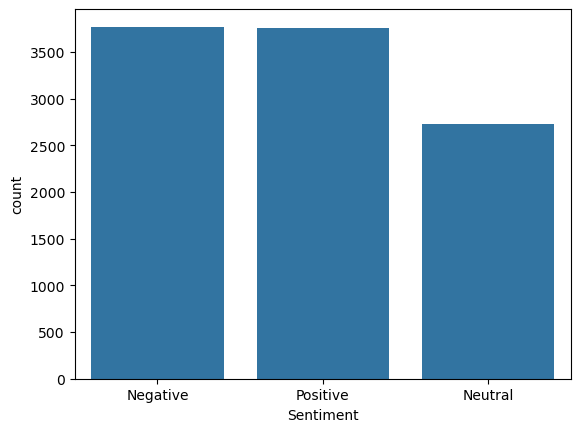

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of sentiment distribution
sns.countplot(x='Sentiment', data=sent_data)
plt.show()

In [24]:
# if not installed, Install wordcloud

In [25]:
pip install wordcloud

In [26]:
import nltk
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [27]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Tokenize and filter function
def extract_keywords(text, sentiment_threshold=0):
    words = nltk.word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word.lower() not in stop_words]
    sentiment_score = sia.polarity_scores(' '.join(filtered_words))['compound']
    return ' '.join(filtered_words) if sentiment_score >= sentiment_threshold else ''

# Apply the function to each comment
sent_data['Processed_Comment'] = sent_data['comment'].apply(lambda x: extract_keywords(x, sentiment_threshold=0.2))

# Combine processed comments into a single string
all_comments = ' '.join(sent_data['Processed_Comment'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kintonde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kintonde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


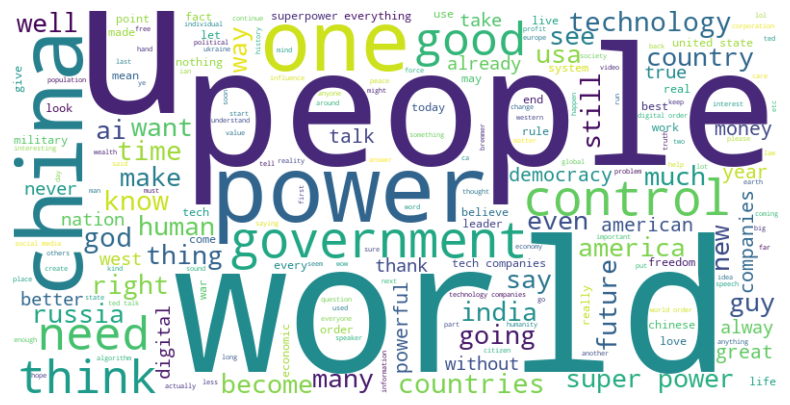

In [28]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()